In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import sys
import os
from pathlib import Path
import importlib

# Add project root to sys.path
project_root = Path(os.getcwd()).parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Import and reload custom modules (to get latest version)
import src.loader
import src.analysis
importlib.reload(src.loader)
importlib.reload(src.analysis)

from src.loader import load_data, clean_data
from src.analysis import (
    calculate_driver_stats, 
    calculate_team_stats, 
    calculate_race_stats,
    calculate_combined_standings,
    calculate_combined_constructor_standings
)

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)
print(f'Project root: {project_root}')
print('Libraries loaded successfully!')

Project root: C:\Users\test\OneDrive\Desktop\PYTHON\f1 visualization
Libraries loaded successfully!


## 1. Load All Datasets

In [23]:
# Load Race Results
df_race = load_data('../data/Formula1_2025Season_RaceResults.csv')
df_race = clean_data(df_race)

# Load Qualifying Results
df_quali = pd.read_csv('../data/Formula1_2025Season_QualifyingResults.csv')

# Load Sprint Results
df_sprint = pd.read_csv('../data/Formula1_2025Season_SprintResults.csv')

# Load Sprint Qualifying Results
df_sprint_quali = pd.read_csv('../data/Formula1_2025Season_SprintQualifyingResults.csv')

print('All datasets loaded!')
print(f'Race Results: {df_race.shape}')
print(f'Qualifying: {df_quali.shape}')
print(f'Sprint: {df_sprint.shape}')
print(f'Sprint Qualifying: {df_sprint_quali.shape}')

All datasets loaded!
Race Results: (459, 12)
Qualifying: (459, 9)
Sprint: (120, 9)
Sprint Qualifying: (120, 9)


## 2. Race Results Overview

In [28]:
print('Race Results - First 10 Rows:')
df_race.head(10)

Race Results - First 10 Rows:


,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time,Finished
0,Australia,1.0,4,Lando Norris,McLaren Mercedes,1,57,1:42:06.304,25,Yes,1:22.167,True
1,Australia,2.0,1,Max Verstappen,Red Bull Racing Honda RBPT,3,57,+0.895,18,No,1:23.081,True
2,Australia,3.0,63,George Russell,Mercedes,4,57,+8.481,15,No,1:25.065,True
3,Australia,4.0,12,Kimi Antonelli,Mercedes,16,57,+10.135,12,No,1:24.901,True
4,Australia,5.0,23,Alexander Albon,Williams Mercedes,6,57,+12.773,10,No,1:24.597,True
5,Australia,6.0,18,Lance Stroll,Aston Martin Aramco Mercedes,13,57,+17.413,8,No,1:25.538,True
6,Australia,7.0,27,Nico Hulkenberg,Kick Sauber Ferrari,17,57,+18.423,6,No,1:25.243,True
7,Australia,8.0,16,Charles Leclerc,Ferrari,7,57,+19.826,4,No,1:25.271,True
8,Australia,9.0,81,Oscar Piastri,McLaren Mercedes,2,57,+20.448,2,No,1:23.242,True
9,Australia,10.0,44,Lewis Hamilton,Ferrari,8,57,+22.473,1,No,1:24.218,True


In [40]:
print('Race Results - Info:')
df_race.info()

Race Results - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             459 non-null    object 
 1   Position          404 non-null    float64
 2   No                459 non-null    int64  
 3   Driver            459 non-null    object 
 4   Team              459 non-null    object 
 5   Starting Grid     459 non-null    int64  
 6   Laps              459 non-null    int64  
 7   Time/Retired      459 non-null    object 
 8   Points            459 non-null    int64  
 9   Set Fastest Lap   459 non-null    object 
 10  Fastest Lap Time  443 non-null    object 
 11  Finished          459 non-null    bool   
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 40.0+ KB


In [27]:
print('Race Results - Statistics:')
df_race.describe()

Race Results - Statistics:


,Position,No,Starting Grid,Laps,Points
count,404.000000,459.000000,459.000000,459.000000,459.000000
mean,9.356436,29.154684,10.612200,54.718954,5.061002
std,5.191775,24.714881,6.416915,17.469546,7.184453
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5.000000,10.000000,5.500000,51.000000,0.000000
50%,9.000000,22.000000,11.000000,57.000000,1.000000
75%,14.000000,43.500000,15.500000,69.000000,9.000000
max,20.000000,87.000000,71.000000,78.000000,25.000000


## 3. Qualifying Results Overview

In [10]:
print('Qualifying Results - First 10 Rows:')
df_quali.head(10)

Qualifying Results - First 10 Rows:


,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
0,Australia,1,4,Lando Norris,McLaren Mercedes,1:15.912,1:15.415,1:15.096,20
1,Australia,2,81,Oscar Piastri,McLaren Mercedes,1:16.062,1:15.468,1:15.180,18
2,Australia,3,1,Max Verstappen,Red Bull Racing Honda RBPT,1:16.018,1:15.565,1:15.481,17
3,Australia,4,63,George Russell,Mercedes,1:15.971,1:15.798,1:15.546,21
4,Australia,5,22,Yuki Tsunoda,Racing Bulls Honda RBPT,1:16.225,1:16.009,1:15.670,18
5,Australia,6,23,Alexander Albon,Williams Mercedes,1:16.245,1:16.017,1:15.737,21
6,Australia,7,16,Charles Leclerc,Ferrari,1:16.029,1:15.827,1:15.755,20
7,Australia,8,44,Lewis Hamilton,Ferrari,1:16.213,1:15.919,1:15.973,23
8,Australia,9,10,Pierre Gasly,Alpine Renault,1:16.328,1:16.112,1:15.980,21
9,Australia,10,55,Carlos Sainz,Williams Mercedes,1:16.360,1:15.931,1:16.062,21


In [30]:
print('Qualifying Results - Info:')
df_quali.info()

Qualifying Results - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Track     459 non-null    object
 1   Position  459 non-null    object
 2   No        459 non-null    int64 
 3   Driver    459 non-null    object
 4   Team      459 non-null    object
 5   Q1        456 non-null    object
 6   Q2        342 non-null    object
 7   Q3        230 non-null    object
 8   Laps      459 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 32.4+ KB


## 4. Sprint Results Overview

In [31]:
print('Sprint Results :')
df_sprint.head(20)

Sprint Results :


,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
0,China,1,44,Lewis Hamilton,Ferrari,1,19,30:39.965,8.0
1,China,2,81,Oscar Piastri,McLaren Mercedes,3,19,+6.889,7.0
2,China,3,1,Max Verstappen,Red Bull Racing Honda RBPT,2,19,+9.804,6.0
3,China,4,63,George Russell,Mercedes,5,19,+11.592,5.0
4,China,5,16,Charles Leclerc,Ferrari,4,19,+12.190,4.0
5,China,6,22,Yuki Tsunoda,Racing Bulls Honda RBPT,8,19,+22.288,3.0
6,China,7,12,Kimi Antonelli,Mercedes,7,19,+23.038,2.0
7,China,8,4,Lando Norris,McLaren Mercedes,6,19,+23.471,1.0
8,China,9,18,Lance Stroll,Aston Martin Aramco Mercedes,10,19,+24.916,0.0
9,China,10,14,Fernando Alonso,Aston Martin Aramco Mercedes,11,19,+38.218,0.0


In [32]:
print('Sprint Qualifying Results - First 10 Rows:')
df_sprint_quali.head(10)

Sprint Qualifying Results - First 10 Rows:


,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
0,China,1,44,Lewis Hamilton,Ferrari,1:31.212,1:31.484,1:30.849,15
1,China,2,1,Max Verstappen,Red Bull Racing Honda RBPT,1:31.916,1:31.521,1:30.867,12
2,China,3,81,Oscar Piastri,McLaren Mercedes,1:31.723,1:31.362,1:30.929,13
3,China,4,16,Charles Leclerc,Ferrari,1:31.518,1:31.561,1:31.057,15
4,China,5,63,George Russell,Mercedes,1:31.952,1:31.346,1:31.169,18
5,China,6,4,Lando Norris,McLaren Mercedes,1:31.396,1:31.174,1:31.393,13
6,China,7,12,Kimi Antonelli,Mercedes,1:31.999,1:31.475,1:31.738,17
7,China,8,22,Yuki Tsunoda,Racing Bulls Honda RBPT,1:32.316,1:31.794,1:31.773,12
8,China,9,23,Alexander Albon,Williams Mercedes,1:32.462,1:31.539,1:31.852,14
9,China,10,18,Lance Stroll,Aston Martin Aramco Mercedes,1:32.327,1:31.742,1:31.982,12


## 5. Missing Values Analysis

In [33]:
def check_missing_values(df, name):
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    result = pd.DataFrame({
        'Missing Values': missing,
        'Percentage': missing_pct
    })
    print(f'\n{name} - Missing Values:')
    return result[result['Missing Values'] > 0]

check_missing_values(df_race, 'Race Results')
check_missing_values(df_quali, 'Qualifying')
check_missing_values(df_sprint, 'Sprint')
check_missing_values(df_sprint_quali, 'Sprint Qualifying')


Race Results - Missing Values:

Qualifying - Missing Values:

Sprint - Missing Values:

Sprint Qualifying - Missing Values:


,Missing Values,Percentage
Q2,30,25.0
Q3,60,50.0


## 6. Unique Values Analysis

In [32]:
print('Race Results - Unique Values per Column:')
for col in df_race.columns:
    print(f'{col}: {df_race[col].nunique()} unique values')

Race Results - Unique Values per Column:
Track: 23 unique values
Position: 20 unique values
No: 21 unique values
Driver: 21 unique values
Team: 12 unique values
Starting Grid: 21 unique values
Laps: 51 unique values
Time/Retired: 319 unique values
Points: 11 unique values
Set Fastest Lap: 2 unique values
Fastest Lap Time: 439 unique values
Finished: 2 unique values


In [33]:
print('\nList of Tracks (Race):')
print(df_race['Track'].unique())

print('\nList of Drivers:')
print(df_race['Driver'].unique())

print('\nList of Teams:')
print(df_race['Team'].unique())


List of Tracks (Race):
['Australia' 'China' 'Japan' 'Bahrain' 'Saudi Arabia' 'Miami'
 'Emilia-Romagna' 'Monaco' 'Spain' 'Canada' 'Austria' 'Great Britain'
 'Belgium' 'Hungary' 'Netherlands' 'Italy' 'Azerbaijan' 'Singapore'
 'United States' 'Mexico' 'Brazil' 'Las Vegas' 'Qatar']

List of Drivers:
['Lando Norris' 'Max Verstappen' 'George Russell' 'Kimi Antonelli'
 'Alexander Albon' 'Lance Stroll' 'Nico Hulkenberg' 'Charles Leclerc'
 'Oscar Piastri' 'Lewis Hamilton' 'Pierre Gasly' 'Yuki Tsunoda'
 'Esteban Ocon' 'Oliver Bearman' 'Liam Lawson' 'Gabriel Bortoleto'
 'Fernando Alonso' 'Carlos Sainz' 'Jack Doohan' 'Isack Hadjar'
 'Franco Colapinto']

List of Teams:
['McLaren Mercedes' 'Red Bull Racing Honda RBPT' 'Mercedes'
 'Williams Mercedes' 'Aston Martin Aramco Mercedes' 'Kick Sauber Ferrari'
 'Ferrari' 'Alpine Renault' 'Racing Bulls Honda RBPT' 'Haas Ferrari'
 'Red Bull Racing Honda EBPT' 'McLaren']


## 7. Championship Standings (Race + Sprint Combined)

In [11]:
driver_standings = calculate_combined_standings(df_race, df_sprint)
constructor_standings = calculate_combined_constructor_standings(df_race, df_sprint)

print('=== DRIVER CHAMPIONSHIP STANDINGS (Race + Sprint) ===')
driver_standings

=== DRIVER CHAMPIONSHIP STANDINGS (Race + Sprint) ===


,Position,Team,Race_Points,Sprint_Points,Total_Points,Race_Wins,Sprint_Wins,Total_Wins
Driver,,,,,,,,
Lando Norris,1,McLaren Mercedes,379,29.0,408.0,7.0,0.0,7.0
Max Verstappen,2,Red Bull Racing Honda RBPT,364,32.0,396.0,7.0,0.0,7.0
Oscar Piastri,3,McLaren Mercedes,363,29.0,392.0,7.0,0.0,7.0
George Russell,4,Mercedes,279,30.0,309.0,2.0,0.0,2.0
Charles Leclerc,5,Ferrari,213,17.0,230.0,0.0,0.0,0.0
Lewis Hamilton,6,Ferrari,131,21.0,152.0,0.0,0.0,0.0
Kimi Antonelli,7,Mercedes,135,15.0,150.0,0.0,0.0,0.0
Alexander Albon,8,Williams Mercedes,70,3.0,73.0,0.0,0.0,0.0
Carlos Sainz,9,Williams Mercedes,54,10.0,64.0,0.0,0.0,0.0


In [12]:
print('=== CONSTRUCTOR CHAMPIONSHIP STANDINGS (Race + Sprint) ===')
constructor_standings

=== CONSTRUCTOR CHAMPIONSHIP STANDINGS (Race + Sprint) ===


,Position,Race_Points,Sprint_Points,Total_Points,Race_Wins,Sprint_Wins
Team,,,,,,
McLaren Mercedes,1,732,58.0,790.0,14.0,0.0
Mercedes,2,414,45.0,459.0,2.0,0.0
Red Bull Racing Honda RBPT,3,385,41.0,426.0,7.0,0.0
Ferrari,4,344,38.0,382.0,0.0,0.0
Williams Mercedes,5,124,13.0,137.0,0.0,0.0
Racing Bulls Honda RBPT,6,88,4.0,92.0,0.0,0.0
Aston Martin Aramco Mercedes,7,71,9.0,80.0,0.0,0.0
Haas Ferrari,8,67,6.0,73.0,0.0,0.0
Kick Sauber Ferrari,9,68,0.0,68.0,0.0,0.0


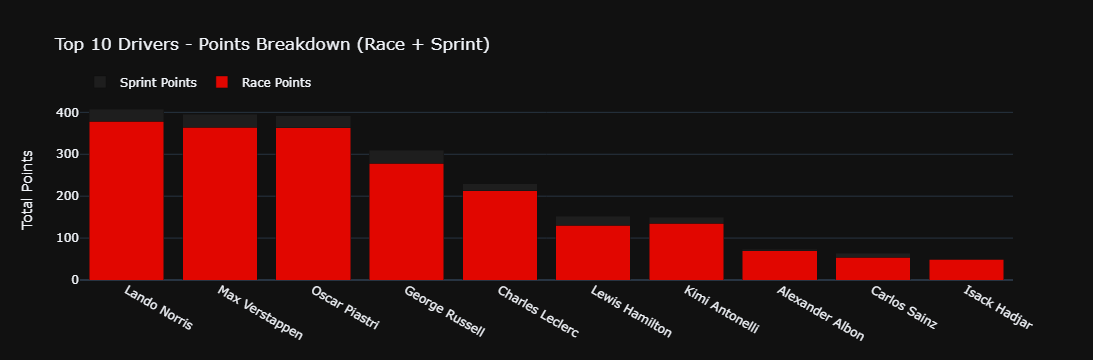

In [34]:
# Points breakdown visualization
top_10 = driver_standings.head(10).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    name='Race Points',
    x=top_10['Driver'],
    y=top_10['Race_Points'],
    marker_color='#E10600'
))

fig.add_trace(go.Bar(
    name='Sprint Points',
    x=top_10['Driver'],
    y=top_10['Sprint_Points'],
    marker_color='#1E1E1E'
))

fig.update_layout(
    title='Top 10 Drivers - Points Breakdown (Race + Sprint)',
    barmode='stack',
    template='plotly_dark',
    yaxis_title='Total Points',
    legend=dict(orientation='h', yanchor='bottom', y=1.02)
)
fig.show()

## 8. Quick Visualizations

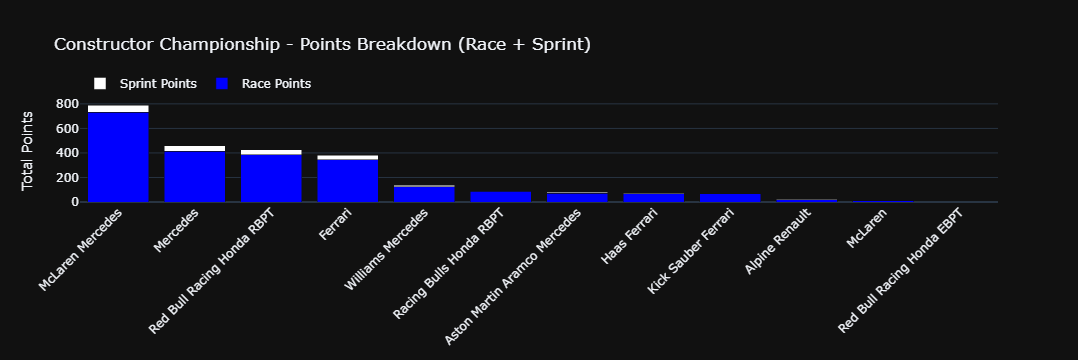

In [30]:
# Constructor Championship Visualization
fig = go.Figure()

fig.add_trace(go.Bar(
    name='Race Points',
    x=constructor_standings.index,
    y=constructor_standings['Race_Points'],
    marker_color='blue'
))

fig.add_trace(go.Bar(
    name='Sprint Points',
    x=constructor_standings.index,
    y=constructor_standings['Sprint_Points'],
    marker_color='white'
))

fig.update_layout(
    title='Constructor Championship - Points Breakdown (Race + Sprint)',
    barmode='stack',
    template='plotly_dark',
    yaxis_title='Total Points',
    xaxis_tickangle=-45,
    legend=dict(orientation='h', yanchor='bottom', y=1.02)
)
fig.show()

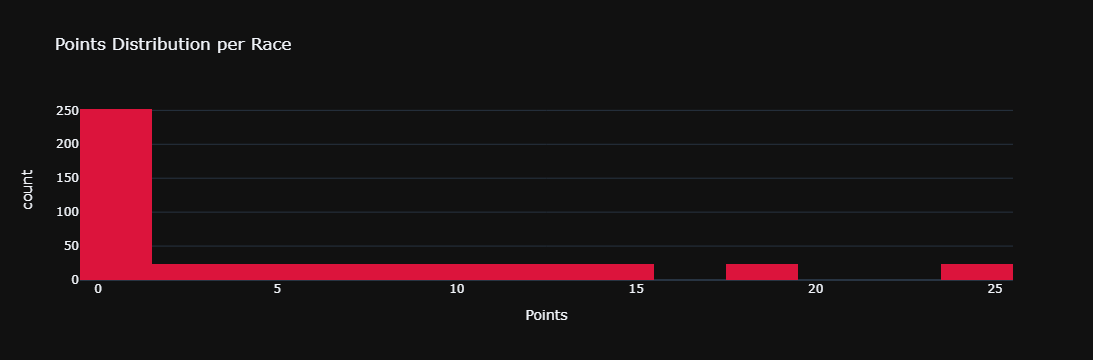

In [16]:
# Points Distribution
fig = px.histogram(df_race, x='Points', nbins=15, title='Points Distribution per Race',
                   color_discrete_sequence=['crimson'])
fig.update_layout(template='plotly_dark')
fig.show()

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



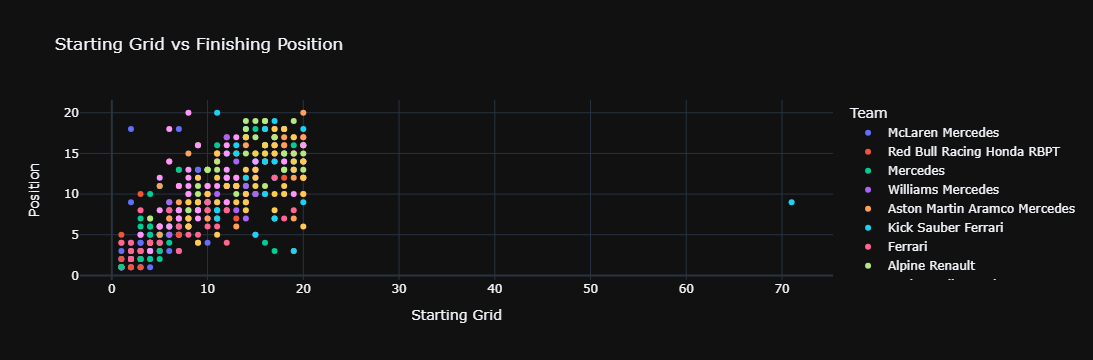

In [17]:
# Position vs Grid Correlation
fig = px.scatter(df_race, x='Starting Grid', y='Position', 
                 color='Team', hover_data=['Driver', 'Track'],
                 title='Starting Grid vs Finishing Position')
fig.update_layout(template='plotly_dark')
fig.show()

---
## Summary

Notebook ini memberikan overview dasar dari semua dataset yang tersedia:
- **Race Results**: Data hasil race dengan posisi, poin, dan status
- **Qualifying**: Data qualifying dengan waktu Q1, Q2, Q3
- **Sprint**: Data hasil sprint race
- **Sprint Qualifying**: Data sprint shootout

Untuk analisis lebih detail, lihat notebook berikutnya.